In [4]:
import tensorflow as tf
import os
import sys
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
from rl import action_learner, action_learner_search, value_estimator
from progress_learner import EventProgressEstimator
import config
import project
# Need to add this import to load class
from project import Project
from importlib import reload
p = project.Project.load("../slidearound_hopstep_1_multiscale.proj")
from rl import block_movement_env
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting

In [144]:
reload(config)
c = config.Config()
c.no_of_loops = 1
# c.constraint_sigma = 0
reload(block_movement_env)
# reload(value_estimator)
reload(action_learner_search)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

policy_est = action_learner_search.PolicyEstimator(c)

sess.run(tf.global_variables_initializer())

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = EventProgressEstimator(is_training=False, name = p.name, config = c)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)

saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
saver.restore(sess, '../progress.mod')

action_ln = action_learner_search.ActionLearner_Search(c, p, progress_estimator, 
                               policy_est, session = sess)

def action_policy(config):
    def boundary_constraint(action):
        for i in range(3):
            if action[i] < config.playground_x[i]:
                return False
            if action[i] > config.playground_x[i] + config.playground_dim[i]:
                return False
        
        return True
    
    def q(state, policy_estimator, no_of_actions = 1, verbose = False, 
       session = None):
        return action_learner_search.random_action_constraint(state, policy_estimator,
                    no_of_actions, verbose, session, boundary_constraint)
    
    return q

explorations = action_ln.learn_one_setup(action_policy(c), verbose = True)

-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (10, 200) after LSTM
self.output.shape = (10,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ../progress.mod
action_level = 0
exploration_index = 0
[(0, 0.46824514865875244), (0, 0.44394984841346741), (0, 0.42003381252288818), (0, 0.35828858613967896), (0, 0.34240123629570007), (0, 0.31046667695045471), (0, 0.26770097017288208), (0, 0.25874891877174377), (0, 0.24292470514774323), (0, 0.24200783669948578), (0, 0.23497280478477478), (0, 0.22774529457092285), (0, 0.21026474237442017), (0, 0.21009290218353271), (0, 0.2032073587179184), (0, 0.20218850672245026), 

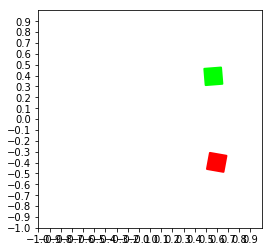

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.22539376  0.88562338  0.33300875]
[[0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.5, 0.9, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.8, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.8, 0.0, 0.0, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.7, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.6, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.5, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.375, 0.5, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, 0.0, 0.0], [0.375, 0.4, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.3, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.3, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.25, 0.3, -0.46211715726000974, 0.0, -0.4621171572

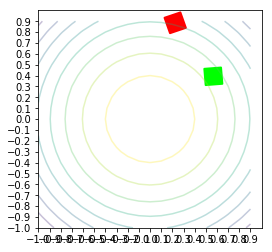

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.47532061 -0.01304514  0.4202172 ]
[[0.5, 0.9, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.7, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.6, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.5, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.375, 0.4, -0.46211715726000974, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.3, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.25, 0.3, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.4, -0.46211715726000974, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.5, 0.0, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.7, 0.0, 0.7615941559557649, 0.46211715726000974, 0.0, -0.46211

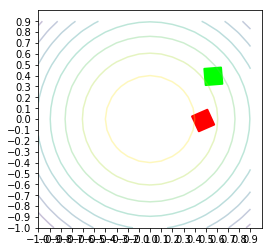

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.83911565 -0.2808123   0.25341885]
[[0.5, 0.9, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.7, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.5, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.375, 0.4, -0.46211715726000974, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.375, 0.3, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.25, 0.3, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.4, -0.46211715726000974, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.6, 0.0, 0.7615941559557649, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.8, 0.0, 0.7615941559557649, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.125, 0.6, 0.0, -0.76159415595

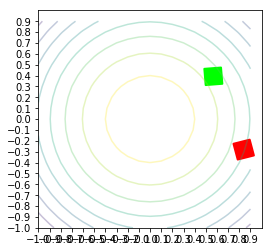

In [145]:
explorations[0].replay()

In [147]:
print (explorations[0].start_config)

for _, from_t, to_t, _, _, success, _, _ in explorations[0].action_storage:
    print (str(from_t) + " " + str(to_t) + " " + str(success) ) 

[Cube : [ 0.59725597 -0.39822445  1.39316013], Cube : [ 0.56717354  0.39338609  0.07934932]]
[ 0.59725597 -0.39822445  1.39316013] [ 0.22539376  0.88562338  0.33300875] True
[ 0.22539376  0.88562338  0.33300875] [ 0.47532061 -0.01304514  0.4202172 ] True
[ 0.47532061 -0.01304514  0.4202172 ] [ 0.83911565 -0.2808123   0.25341885] True


In [152]:
reload(block_movement_env)
a = block_movement_env.BlockMovementEnv(c, p.speed, progress_estimator = progress_estimator, session = sess)

In [153]:
a.test_case(a.bad_case_1)

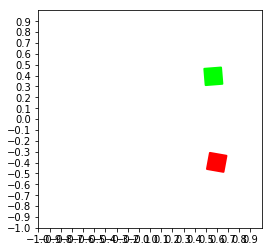

(None, None)
[ 0.22539376  0.88562338  0.33300875]
[[0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.5, 0.9, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.8, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.8, 0.0, 0.0, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.7, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.6, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.5, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.375, 0.5, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, 0.0, 0.0], [0.375, 0.4, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.3, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.3, 0.0, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.25, 0.3, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.25, 0.3, 0.0, 0.0, 0.462

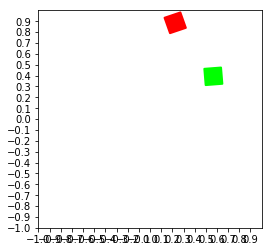

(None, None)
[ 0.47532061 -0.01304514  0.4202172 ]
[[0.5, 0.9, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.7, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.6, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.5, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.375, 0.4, -0.46211715726000974, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.375, 0.3, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.25, 0.3, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.4, -0.46211715726000974, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.5, 0.0, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.7, 0.0, 0.7615941559557649, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.8, 0.0, 0.46211715726000974, 0.46211715

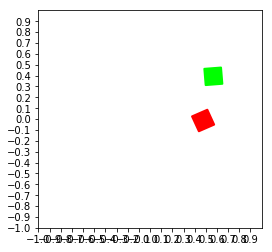

(None, None)
[ 0.83911565 -0.2808123   0.25341885]
[[0.5, 0.9, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.7, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.5, 0.5, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.375, 0.4, -0.46211715726000974, -0.46211715726000974, -0.46211715726000974, 0.0, 0.0, 0.0], [0.375, 0.3, 0.0, -0.46211715726000974, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.25, 0.3, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.4, -0.46211715726000974, 0.46211715726000974, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.6, 0.0, 0.7615941559557649, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.8, 0.0, 0.7615941559557649, 0.46211715726000974, 0.0, -0.46211715726000974, 0.0], [0.125, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.125, 0.6, 0.0, -0.7615941559557649, -0.46211715726000974, 0.0, 0.0, 0.0], [0.125, 0.4, 0.0, -0.761

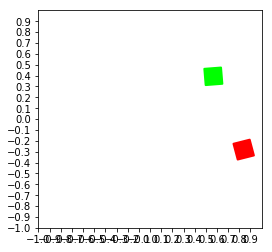

In [154]:
a.replay()